# **The Evolution of Music from 2000 to 2023: A Spotify Data Analysis**

### **This dataset has been retrieved from [Kaggle](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks), I wanted to do analyze this dataset because I love listening to music, and I thought that it was a good chance to get hands-on practice in a data analysis project like this. My goal is to see what makes a song be more popular and how the industry has evolved over time.**

## **1. Import the dependencies we'll use**

In [71]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;
import plotly.express as px
from sklearn.metrics import r2_score;
from sklearn.linear_model import LinearRegression

df = pd.read_csv("spotify_data.csv", index_col=0)

df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


## **2. First data cleaning and general overview**

### **2.1. Check NaN values**

In [2]:
df.isna().sum()

artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

### **2.2. Drop NaN values**

In [3]:
df = df.dropna(axis=0)


### **2.3. Check duplicated values**

In [26]:
df.duplicated().sum()

0

### **2.4. General overview**

In [32]:
df.shape

(1159764, 19)

In [30]:
df.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06
mean,1.838309e+01,2.011955e+03,5.374425e-01,6.396737e-01,5.287763e+00,-8.981292e+00,6.346560e-01,9.281520e-02,3.215380e-01,2.523423e-01,2.230197e-01,4.555689e-01,1.213775e+02,2.495587e+05,3.885880e+00
std,1.588563e+01,6.803908e+00,1.844753e-01,2.704993e-01,3.555204e+00,5.682203e+00,4.815267e-01,1.268416e-01,3.549873e-01,3.650701e-01,2.010712e-01,2.685169e-01,2.977964e+01,1.494243e+05,4.676983e-01
min,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879800e+01,1.810910e+05,4.000000e+00
50%,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257405e+05,4.000000e+00
75%,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869070e+05,4.000000e+00
max,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159764 entries, 0 to 1473395
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159749 non-null  object 
 1   track_name        1159763 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  tempo

## **3. Study how the music has evolved over time**

### **3.1. First of all, we need to get the parameters we want to study**

In [4]:
df["duration"] = df["duration_ms"] / 60000

df.drop("duration_ms", axis=1, inplace=True)

df

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,3,4.002767
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,4,3.606450
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,4,2.649333
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,4,5.071550
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,4,4.072000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,3,5.733550
1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,4,4.751117
1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,4,3.570883
1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,3,3.985550


In [5]:
energy = pd.DataFrame(df.groupby(["year"])["energy"].mean())
danceability = pd.DataFrame(df.groupby(["year"])["danceability"].mean())
popularity = pd.DataFrame(df.groupby(["year"])["popularity"].mean())
liveness = pd.DataFrame(df.groupby(["year"])["liveness"].mean())
loudness = pd.DataFrame(df.groupby(["year"])["loudness"].mean())
valence = pd.DataFrame(df.groupby(["year"])["valence"].mean())
speechiness = pd.DataFrame(df.groupby(["year"])["speechiness"].mean())
duration = pd.DataFrame(df.groupby(["year"])["duration"].mean())
tempo = pd.DataFrame(df.groupby(["year"])["tempo"].mean())
parameters = pd.concat(
    [energy, danceability, popularity, liveness, loudness, duration, tempo, valence, speechiness],
    axis=1,
)

parameters

,energy,danceability,popularity,liveness,loudness,duration,tempo,valence,speechiness
year,,,,,,,,,
2000,0.604446,0.528590,10.736181,0.219137,-10.148483,4.331459,119.853731,0.507284,0.084210
2001,0.600322,0.524793,11.253359,0.219772,-10.097640,4.365222,119.115111,0.488250,0.085461
2002,0.622776,0.531639,11.679041,0.224506,-9.587969,4.388925,119.802349,0.498285,0.085943
2003,0.627254,0.526321,12.435730,0.224276,-9.375994,4.316647,120.105939,0.491708,0.087809
2004,0.637659,0.530033,12.298732,0.228731,-9.109423,4.306355,120.454719,0.491882,0.087039
2005,0.631733,0.525542,13.425044,0.228458,-9.267949,4.361084,120.742589,0.487344,0.088181
2006,0.634384,0.533050,13.137903,0.224144,-9.139491,4.386501,120.946902,0.486790,0.089972
2007,0.644446,0.533309,13.471446,0.228937,-9.028157,4.415313,121.062447,0.478078,0.092813
2008,0.651215,0.534577,13.462894,0.226360,-8.763337,4.398722,122.401332,0.476483,0.090511


#### **Reflection of 3.1: Converting the duration given in ms to seconds and reorganize all the features using their means per year will ease us the process of plotting the data and interpretate it when it comes to analyze it over time.**

### **3.2. Plotting how loudness has evolved over time**

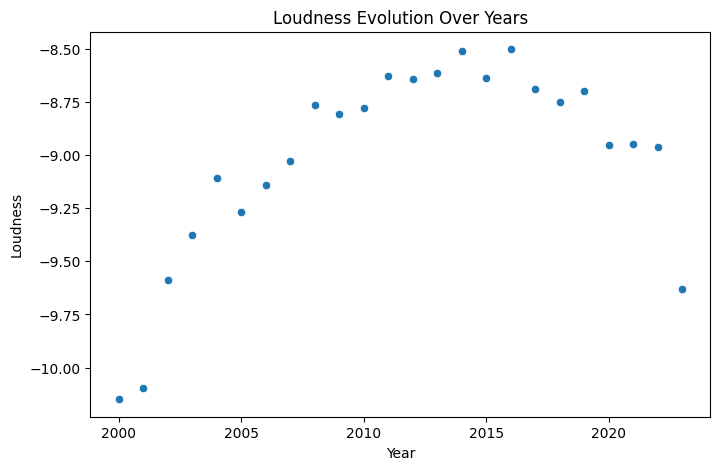

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=parameters, x="year", y="loudness")
plt.xlabel("Year")
plt.ylabel("Loudness")
plt.title("Loudness Evolution Over Years")
plt.show()

#### **Reflection of 3.2: This plot represents a historical phenomenom called the loudness war, wich was a technique used by music engineers to make their songs stand out due to their high volume, we can see how it was increasing during the first two decades of the century, now it's less popular.**

### **3.3. Plotting how liveness has evolved over time**

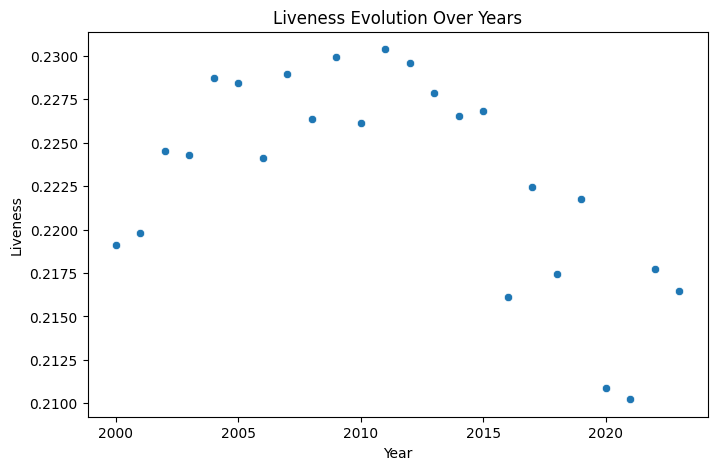

In [64]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=parameters, x="year", y="liveness")
plt.xlabel("Year")
plt.ylabel("Liveness")
plt.title("Liveness Evolution Over Years")
plt.show()

#### **Reflection of 3.3: Since liveness estimates how likely is this track a live performance (like a concert) with this chart we can see how the music has been professionalized over the years, after 2010, the vast majority of music went to be recorded on a studio. Nowadays, we can see only a few examples of recent live performances on Spotify.**

### **3.4. Plotting how duration has evolved over time**

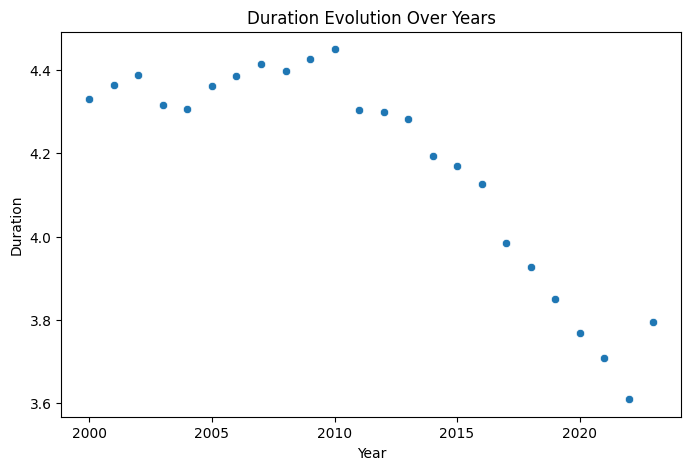

In [71]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=parameters, x="year", y="duration")
plt.xlabel("Year")
plt.ylabel("Duration")
plt.title("Duration Evolution Over Years")
plt.show()

#### **Reflection of 3.4: This plot reflects clearly the "attention economy", which tells us that the content that we consume is shorter and more ephemeral over time due to the short attention span of this society, this decreasing effect its more pronounced with the release of instagram (2010), and tiktok (2016)**

### **3.5. See what genders did it better**

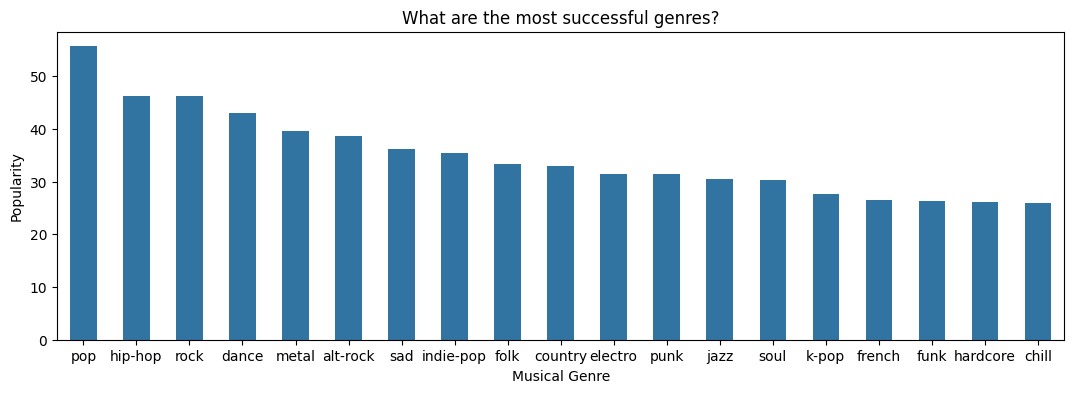

In [72]:
genders = pd.DataFrame(df.groupby(df["genre"])["popularity"].mean())

famous = genders.loc[genders["popularity"]>25]

famous = famous.sort_values("popularity", ascending=False)

plt.figure(figsize=(13, 4))
sns.barplot(data=famous, x="genre", y="popularity", width=0.5)
plt.xlabel("Musical Genre")
plt.ylabel("Popularity")
plt.title("What are the most successful genres?")
plt.show()

#### **Reflection of 3.6: This plot shows us how clearly pop has dominated the music scene over the years, followed by hip-hop, rock and dance, they're the biggest faces of the industry**

## **4. Comparision between songs, what do the popular songs have that the lesser-known ones don't?**

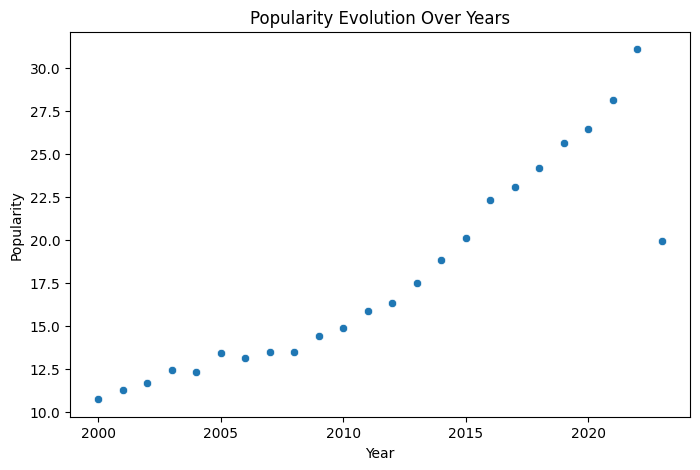

In [73]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=parameters, x="year", y="popularity")
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.title("Popularity Evolution Over Years")
plt.show()

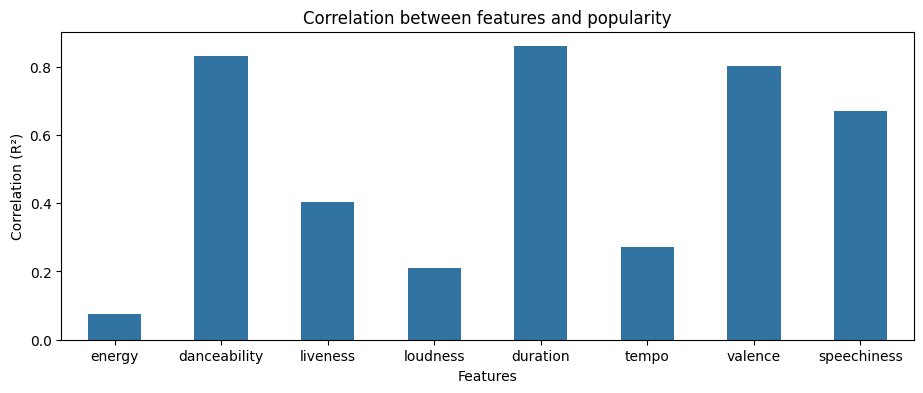

In [77]:
correlations = {}

i = 0

for i in parameters.columns : 
    X = parameters[i].values.reshape(-1,1)
    y = parameters["popularity"].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)
    if r_squared != 1:
        correlations[i] = r_squared



correlations =  pd.DataFrame.from_dict(correlations, orient='index', columns=['r_squared'])

plt.figure(figsize=(11,4))
sns.barplot(data=correlations, x=correlations.index, y="r_squared", width=.5)
plt.xlabel("Features")
plt.ylabel("Correlation (R²)")
plt.title("Correlation between features and popularity")
plt.show()



In [19]:
correlations

,r_squared
energy,0.074072
danceability,0.830390
liveness,0.403737
loudness,0.210218
duration_ms,0.859533
tempo,0.271019
valence,0.801688
speechiness,0.670424


#### **Reflection of 4: These charts show us the features that influence the most when it comes to guess the popularity of the song, the variables are:** 
1. **Time:**
    The trend here reflects the Spotify ecosystem, not necessarily the global music landscape. For example, Thriller by Michael Jackson is one of the best-selling songs of all time, but if it isn’t being streamed as much today as Blinding Lights by The Weeknd, Spotify’s popularity metric will reflect that. It’s about current user engagement, not historical success.
2. **Danceability:**
    This is reasonable, because, the more danceable the song is, the more popular it will be and it's more possible to be streamed in a lot of places such as discotheques. 
3. **Duration:**
    As we say in section 3.4, a lower duration means a more demand of that song in most of the cases.
4. **Valence:**
    The saddest songs are always the most popular ones. This can be evidenced when we look at the billboard 100's and the first places are heartbreaking songs, e.g., Blinding Lights by The Weeknd is the most streamed song in Spotify, it is energic, but the letters are related to sad experiences. 

## **5. Genre Comparisions**

In [65]:
energy = pd.DataFrame(df.groupby(["genre"])["energy"].mean())
danceability = pd.DataFrame(df.groupby(["genre"])["danceability"].mean())
popularity = pd.DataFrame(df.groupby(["genre"])["popularity"].mean())
liveness = pd.DataFrame(df.groupby(["genre"])["liveness"].mean())
loudness = pd.DataFrame(df.groupby(["genre"])["loudness"].mean())
valence = pd.DataFrame(df.groupby(["genre"])["valence"].mean())
speechiness = pd.DataFrame(df.groupby(["genre"])["speechiness"].mean())
duration = pd.DataFrame(df.groupby(["genre"])["duration"].mean())
tempo = pd.DataFrame(df.groupby(["genre"])["tempo"].mean())
instrumentalness = pd.DataFrame(df.groupby(["genre"])["instrumentalness"].mean())
genres = pd.concat(
    [energy, danceability, popularity, liveness, loudness, duration, tempo, valence, speechiness, instrumentalness],
    axis=1,
)

genres

,energy,danceability,popularity,liveness,loudness,duration,tempo,valence,speechiness,instrumentalness
genre,,,,,,,,,,
acoustic,0.427905,0.535313,17.825094,0.176891,-10.444731,3.632057,118.452399,0.429997,0.049179,0.150340
afrobeat,0.693740,0.652585,8.559984,0.184229,-8.115054,4.559483,119.093185,0.695503,0.090955,0.266751
alt-rock,0.739956,0.502348,38.596807,0.205582,-6.224047,3.933202,126.244973,0.453770,0.060960,0.081634
ambient,0.263210,0.329441,20.008743,0.145289,-19.240342,4.976340,107.841678,0.158700,0.050128,0.766679
black-metal,0.834440,0.264975,11.082658,0.246642,-7.043945,5.529791,125.110665,0.152843,0.090978,0.546191
...,...,...,...,...,...,...,...,...,...,...
swedish,0.656501,0.541318,19.932329,0.210804,-8.239616,3.807658,122.033923,0.475983,0.096156,0.140599
tango,0.322002,0.549137,2.523326,0.211207,-10.968929,3.077070,116.248238,0.569726,0.077496,0.247612
techno,0.784461,0.663677,14.704989,0.176909,-8.512766,5.597752,132.391195,0.363360,0.080074,0.632240


### **5.1. Duration behaviour between genres**

In [23]:
duration_popular = genres[["duration", "popularity"]].copy()

duration_popular = duration_popular.loc[duration_popular["popularity"] > 20]

fig = px.line(duration_popular, x=duration_popular.index, y="duration", title="Duration comparision between the most popular genres")

fig.update_layout(
    width=1500,                 
    height=500,                 
    xaxis_title="Genre",         
    yaxis_title="Duration (Minutes)",     
    title_font_size=20          
)

fig.show()


In [60]:
duration_popular.sort_values("popularity").head(10)

,duration,popularity
genre,,
ambient,4.976340,20.008743
sertanejo,3.370193,20.169703
hard-rock,4.273789,20.489493
blues,4.209673,21.620059
house,5.044098,23.080069
singer-songwriter,3.928388,23.421090
spanish,3.882333,23.603925
emo,3.364586,23.661981
edm,4.619953,23.889795


#### **Reflection of 5.1: In this plot generated with plotly we can see that the mean duration of the most popular genres, notice that the genres with a higher duration are less popular than the most successful ones (e.g., Ambient and House), this confirms the conclusions we made in the section 3.4**

### **5.2 Pop Vs HipHop**

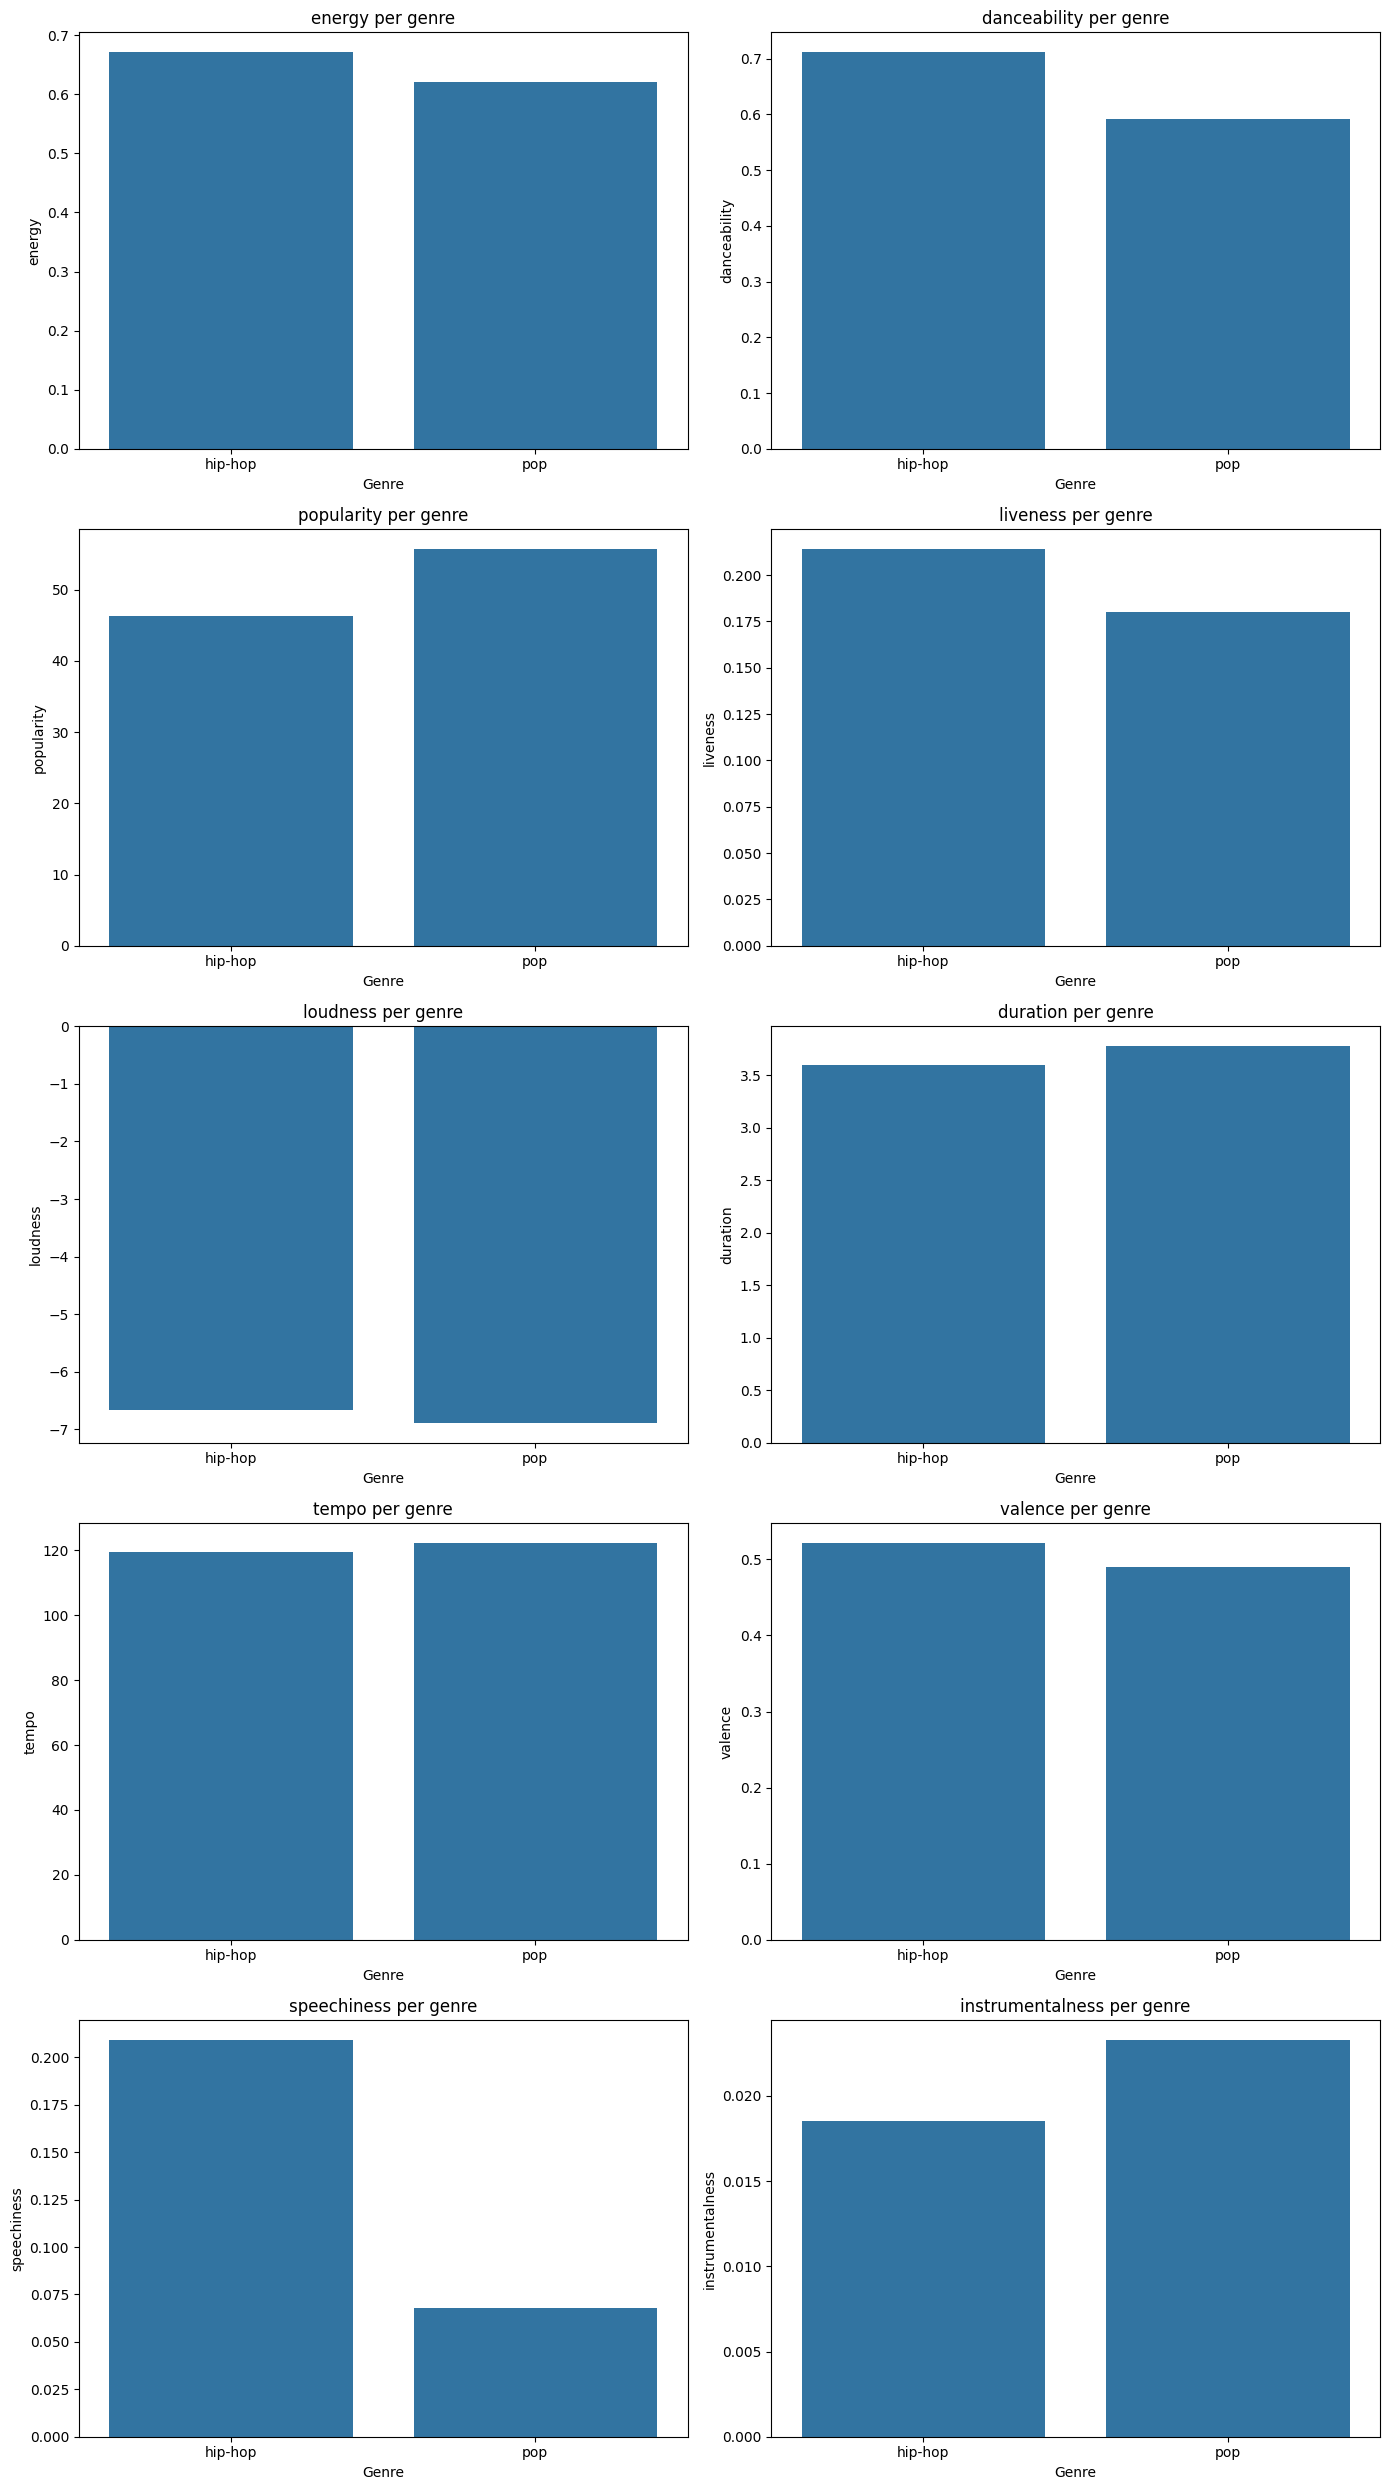

In [72]:
pop_vs_hiphop = genres.loc[(genres.index == "pop") | (genres.index == "hip-hop")]

num_features = len(pop_vs_hiphop.columns)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 25))

for i, feature in enumerate(pop_vs_hiphop.columns):
    row = i // 2
    col = i % 2
    sns.barplot(
        data=pop_vs_hiphop.reset_index(), 
        x="genre", 
        y=feature,
        ax=axes[row, col]
    )
    axes[row, col].set_title(f"{feature} per genre")
    axes[row, col].set_xlabel("Genre")
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()

#### **Reflection of 5.2: These graphics represent the differences between Pop and Hip-Hop, I've wanted to compare them because they're the two most popular genres, the biggest gaps we can see is in the speechiness and instrumentalness features, we can see that, in average, hip-hop has up to 2.5 times more amount of words spoken than pop, that is compensed in the pop beats. In the rest of the feaures we can see similar values.**

## **6. Final conclusions**

### **This is my attempt to explain how music has evolved and what does it make it unique. I learned a lot of new terms and also I gained hands-on practice with new data analysis tools that I think they'll be useful when I start learning ML.**